# Text Analysis of Charles Dickens' Oliver Twist

In [1]:
#import nltk and download nltk packages

import nltk
from urllib import request
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

# Load Text From Web

In [2]:
#Get text "Oliver Twist" from Project Guntenberg - load the data 
#convert it to UFT8 
#Store converted result as variable text  

url = "http://www.gutenberg.org/cache/epub/730/pg730.txt"
response = request.urlopen(url)
text = response.read().decode('utf8')

In [3]:
len(text)

936251

# Cleaning the Text to Remove Punctuation Marks

In [4]:
# remove punctuation marks from the text and assigned result to variable 'free_text'

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

# remove punctuation from the string
free_text = ""
for char in text:
   if char not in punctuations:
       free_text = free_text+ char

# Cleaning the Text to Remove Numbers

In [5]:
#to remove numbers
clean_text = ''.join(c for c in free_text if not c.isdigit())

In [6]:
len(clean_text)

891167

# Split to Text to a List - Whitespace

In [7]:
# split into words by white space
words = clean_text.split()

# Normalization - Converting Text to Lowercase

In [8]:
# convert to lower case
words = [word.lower() for word in words]

# Tokenization and Removal of Stopwords

In [9]:
#to perform tokenization on the text, convert the "words" which is a list to a string using list comprehension 

# using list comprehension 
words_str = ' '.join(map(str, words)) 

# to remove stopwords from the text 

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(words_str)

filtered_text = [w for w in word_tokens if not w in stop_words]

filtered_text = []

for w in word_tokens:
    if w not in stop_words:
        filtered_text.append(w)

# Stemming & Lemmatization

In [10]:
# to reduce the text to the root 
ps = PorterStemmer()
stemmed_words = []
for w in filtered_text: # using for loop to pass through the text to stem words
    stemmed_words.append(ps.stem(w))
    
wn = WordNetLemmatizer()
lemmed_words = []
for word in stemmed_words:
    lemmed_words.append(wn.lemmatize(word))

In [11]:
len(lemmed_words)

80210

# Frequency Distribrution

In [13]:
#to know the frequency distribution of words in the text 

from nltk.probability import FreqDist
fdist = FreqDist(lemmed_words)
print(fdist)

<FreqDist with 7687 samples and 80210 outcomes>


In [14]:
#the frequent word and the number of times it was mentioned in the text

fdist.most_common(1)

[('mr', 1344)]

In [15]:
#to know the first ten frequent words mentioned in the text

fdist.most_common(10)

[('mr', 1344),
 ('said', 1230),
 ('oliv', 881),
 ('repli', 521),
 ('upon', 481),
 ('look', 474),
 ('one', 465),
 ('old', 448),
 ('would', 410),
 ('bumbl', 396)]

# Visual Representation of The First Ten Frequent Words


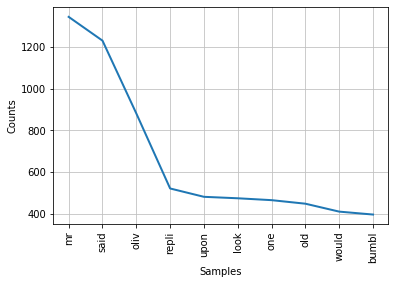

In [16]:
# Plotting frequencies on graph using matplotlib

import matplotlib.pyplot as plt
fdist.plot(10,cumulative=False)
plt.show()

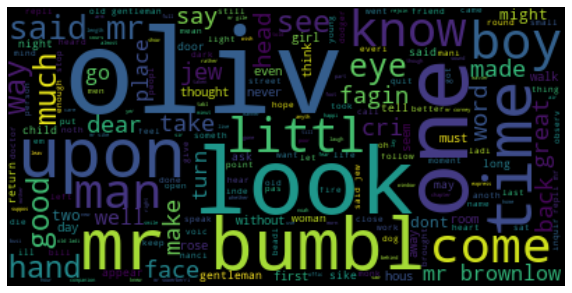

In [17]:
# using wordcloud 

# for wordcloud representation, change list to string

lemmed_str = ' '.join([str(elem) for elem in lemmed_words]) 

from wordcloud import WordCloud
wordcloud = WordCloud().generate(lemmed_str)
#Dislay the generated image
plt.figure( figsize=(10,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [18]:
#sentiment analysis using textblob

#textblob wordcloud %pip install textblob
from textblob import TextBlob

blob = TextBlob(lemmed_str)

from textblob import TextBlob
print(format(blob.sentiment))


Sentiment(polarity=0.08228097558751675, subjectivity=0.45884504140555105)


In [19]:
#to know the type of sentiment in the text

from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

sentiment_analyse(lemmed_str)

Positive Sentiment
